In [2]:
import pennylane as qml
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
import pandas as pd
import argparse
import os
import math
import datetime
import time
from qiskit import QuantumCircuit
from qiskit import Aer, transpile

In [4]:
import numpy as np
import torch
import pennylane as qml

dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev, interface='torch')
def gen_circuit_1(w):
    # random noise as generator input
    z1 = torch.tensor([random.uniform(-1, 1)])
    z2 = torch.tensor([random.uniform(-1, 1)])
    layers = 1
    qubits = 4
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(layers):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

# Initialize optimizer
opt = torch.optim.Adam([torch.tensor(0.1, requires_grad=True) for i in range(2 * 4 * 4 + 4 * 4)], lr=0.1)

# Define cost function
def cost(w):
    return gen_circuit_1(w).sum()

# Train the circuit
num_iterations = 100
for i in range(num_iterations):
    opt.zero_grad()
    loss = cost(opt.param_groups[0]['params'])
    loss.backward()
    opt.step()
    if i % 10 == 0:
        print('Iteration = {:}, Cost = {:.3f}'.format(i, loss.item()))


Iteration = 0, Cost = 3.177
Iteration = 10, Cost = 3.963
Iteration = 20, Cost = 3.912
Iteration = 30, Cost = 3.336
Iteration = 40, Cost = -0.605
Iteration = 50, Cost = -3.983
Iteration = 60, Cost = -3.592
Iteration = 70, Cost = -3.309
Iteration = 80, Cost = -1.636
Iteration = 90, Cost = -3.936


In [5]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev, interface='torch')
def gen_circuit_1(w):
    # random noise as generator input
    z1 = torch.tensor([random.uniform(-1, 1)])
    z2 = torch.tensor([random.uniform(-1, 1)])
    layers = 1
    qubits = 4
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(layers):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]


In [6]:
#Trainability
import torch.optim as optim

# define the loss function
def loss(w):
    return gen_circuit_1(w).sum()

# initialize the generator circuit parameters
w = torch.tensor(np.random.randn(8), requires_grad=True)

# create the optimizer
optimizer = optim.Adam([w], lr=0.1)

# train the circuit
for i in range(100):
    optimizer.zero_grad()
    L = loss(w)
    L.backward()
    optimizer.step()
    print(f"Step {i+1}, Loss: {L.item()}")


Step 1, Loss: 2.934264814436877
Step 2, Loss: 3.0558869092338465
Step 3, Loss: 2.8809880884431136
Step 4, Loss: 2.233466716511801
Step 5, Loss: 2.4498612517571945
Step 6, Loss: 2.2079244469776094
Step 7, Loss: 1.3178123729280369
Step 8, Loss: 1.2638001083805315
Step 9, Loss: 1.02546005231304
Step 10, Loss: 1.4120221058418592
Step 11, Loss: 0.5684221761804431
Step 12, Loss: 0.4324611824837491
Step 13, Loss: 0.9369755649992512
Step 14, Loss: 0.7540080534287215
Step 15, Loss: 0.5448380861578412
Step 16, Loss: 0.017711637464923435
Step 17, Loss: 0.3177703767625715
Step 18, Loss: -0.16111720946186403
Step 19, Loss: -0.006033793837686319
Step 20, Loss: -0.1903297164594302
Step 21, Loss: -0.33299945060346625
Step 22, Loss: -0.3983302972976942
Step 23, Loss: -0.5902487539875615
Step 24, Loss: -0.30714164407131495
Step 25, Loss: -0.42595739068994737
Step 26, Loss: -0.5376912125769081
Step 27, Loss: -0.7707871614013309
Step 28, Loss: -0.19804967529267958
Step 29, Loss: -1.0746554508924575
Step 3

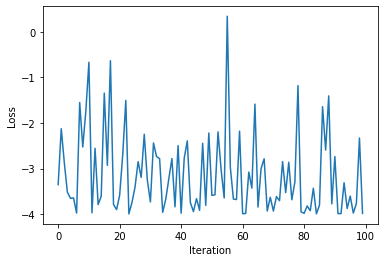

In [8]:
#Training Trajectory

import matplotlib.pyplot as plt

loss_trajectory = []

# train the circuit
for i in range(100):
    optimizer.zero_grad()
    L = loss(w)
    L.backward()
    optimizer.step()
    loss_trajectory.append(L.item())

# plot the loss trajectory
plt.plot(loss_trajectory)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [9]:
#Expressibility

def calculate_expressibility(circuit, num_params, num_trials):
    results = []

    for i in range(num_trials):
        params = np.random.randn(num_params)
        qml_params = torch.tensor(params, requires_grad=False)
        expvals = circuit(qml_params)
        results.append(expvals)

    return np.array


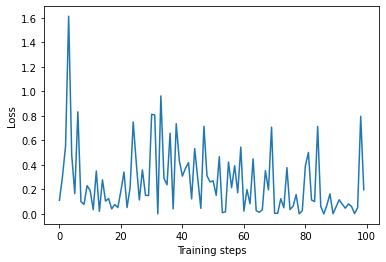

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pennylane as qml
import random

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev, interface="torch")
def gen_circuit_1(params):
    # random noise as generator input
    z1 = torch.tensor(random.uniform(-1, 1))
    z2 = torch.tensor(random.uniform(-1, 1))
    layers = 1
    qubits = 4
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(torch.arcsin(z1), wires=i)
        qml.RZ(torch.arcsin(z2), wires=i)
    for l in range(layers):
        for i in range(qubits):
            qml.RY(params[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(params[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

def train(circuit, steps=100, lr=0.1):
    opt = torch.optim.Adam([torch.tensor([0.1], requires_grad=True), torch.tensor([0.2], requires_grad=True)] + [params], lr=lr)
    history = []
    for i in range(steps):
        opt.zero_grad()
        loss = 1 - gen_circuit_1(params)[0]
        loss.backward()
        opt.step()
        history.append(loss.item())
    return history

params = torch.randn(8, requires_grad=True)
train_history = train(gen_circuit_1(params))
plt.plot(train_history)
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()


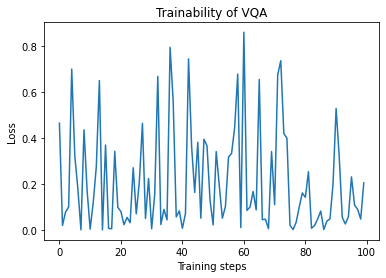

In [21]:
import pennylane as qml
import torch
import random
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev, interface="torch")
def gen_circuit_1(params):
    # random noise as generator input
    z1 = torch.tensor(random.uniform(-1, 1))
    z2 = torch.tensor(random.uniform(-1, 1))
    layers = 1
    qubits = 4
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(torch.arcsin(z1), wires=i)
        qml.RZ(torch.arcsin(z2), wires=i)
    for l in range(layers):
        for i in range(qubits):
            qml.RY(params[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(params[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

class Circuit(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.params = torch.nn.Parameter(torch.randn(8, requires_grad=True))

    def forward(self):
        return gen_circuit_1(self.params)

def train(circuit, steps=100, lr=0.1):
    """
    Train a quantum circuit to perform a VQA using gradient descent.

    Args:
        circuit (torch.nn.Module): quantum circuit to train
        steps (int): number of training steps
        lr (float): learning rate for the optimizer

    Returns:
        np.array: history of the loss function during training
    """
    opt = torch.optim.Adam(circuit.parameters(), lr=lr)
    history = []

    for i in range(steps):
        opt.zero_grad()
        loss = 1 - circuit()[0]
        loss.backward()
        opt.step()
        history.append(loss.detach().numpy())

    return history

circuit = Circuit()

# Trainability of VQA
train_history = train(circuit)
plt.plot(train_history)
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.title('Trainability of VQA')
plt.show()


In [9]:
    #Nelder Mead optimizer
#    self.g_optimizer = torch.optim.SGD(list(self.G.parameters())+list(self.V.parameters())+[gen_weights],
#                                   lr=self.g_lr, momentum=0, nesterov=False)

In [ ]:
        #ADAM optimizer
#        self.g_optimizer = torch.optim.Adam(list(self.G.parameters())+list(self.V.parameters())+[gen_weights],
#                                    self.g_lr, [self.beta1, self.beta2])

In [8]:
#Pennylane Circuit ID 9
dev = qml.device('default.qubit', wires=config.qubits)
@qml.qnode(dev, interface='torch')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)

    # construct generator circuit for both atom vector and node matrix
    for i in range(config.qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(config.layer):
        for i in range(config.qubits):
            qml.Hadamard(wires=i)
        for i in range(config.qubits-1):
            qml.CZ(wires=[i, i+1])
        for i in range(config.qubits):
            qml.RX(w[i], wires = i)
    return [qml.expval(qml.PauliZ(i)) for i in range(config.qubits)]


In [10]:
#Pennylane Circuit ID 2
dev = qml.device('default.qubit', wires=config.qubits)
@qml.qnode(dev, interface='torch')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(config.qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
        
        
    for l in range(config.layer):
        for i in range(config.qubits):
            qml.RX(w[i], wires = i)
            qml.RZ(w[i], wires = i)
        for i in range(config.qubits-1):
            qml.CNOT(wires=[i+1, i])
    return [qml.expval(qml.PauliZ(i)) for i in range(config.qubits)]

In [3]:
#Pennylane Circuit ID 3
dev = qml.device('default.qubit', wires=config.qubits)
@qml.qnode(dev, interface='torch')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)

    # construct generator circuit for both atom vector and node matrix
    for i in range(config.qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
        
        
    for l in range(config.layer):
        for i in range(config.qubits):
            qml.RX(w[i], wires = i)
            qml.RZ(w[i], wires = i)
        for i in range(config.qubits-1):
            qml.CRZ(w[i+config.qubits],wires=[i+1, i])
    return [qml.expval(qml.PauliZ(i)) for i in range(config.qubits)]

In [11]:
#Pennylane Circuit ID 6
dev = qml.device('default.qubit', wires=4)
@qml.qnode(dev, interface='torch')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    layers = 1
    qubits = 4
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
        
        
    for l in range(layers):
        for i in range(qubits):
            qml.RX(w[i], wires = i)
            qml.RZ(w[i], wires = i)
        qml.CRX(w[i], wires=[3,2])
        qml.CRX(w[i], wires=[3,1])
        qml.CRX(w[i], wires=[3,0])
        qml.CRX(w[i], wires=[2,3])
        qml.CRX(w[i], wires=[2,1])
        qml.CRX(w[i], wires=[2,0])
        qml.CRX(w[i], wires=[1,3])
        qml.CRX(w[i], wires=[1,2])
        qml.CRX(w[i], wires=[1,0])
        for i in range(qubits):
            qml.RX(w[i], wires = i)
            qml.RZ(w[i], wires = i)
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

In [7]:
#Pennylane Circuit ID 13
dev = qml.device('default.qubit', wires=4)
@qml.qnode(dev, interface='torch')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    layers = 1
    qubits = 4
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
        
        
    for l in range(layers):
        for i in range(qubits):
            qml.RX(w[i], wires = i)
            qml.RZ(w[i], wires = i)
        qml.CRZ(w[i], wires=[3,0])
        qml.CRZ(w[i], wires=[0,1])
        qml.CRZ(w[i], wires=[1,2])
        qml.CRZ(w[i], wires=[2,3])
        for i in range(qubits):
            qml.RX(w[i], wires = i)
            qml.RZ(w[i], wires = i)
        qml.CRZ(w[i], wires=[0,3])
        qml.CRZ(w[i], wires=[1,0])
        qml.CRZ(w[i], wires=[2,1])
        qml.CRZ(w[i], wires=[3,2])

    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]